#### Análisis y Procesamiento de Señales

---

# Tarea Semanal N°7
## *Transformada Z y Respuesta en frecuencia*

#### Augusto Colugnatti

---

## Introducción teórica

Como se desarrolló en la TS2, una ecuación en diferencias vendría a ser la contraparte discreta de una ecuación diferencial (de carácter continuo). En el procesamiento de señales, estas ecuaciones son normalmente utilizadas para describir sistemas LTI (lineales e invariantes en el tiempo), siguiendo el siguiente modelo matemático:

\begin{equation}
\sum_{k=-\infty}^{\infty}a_k \cdot y_{[n-k]} = \sum_{k=-\infty}^{\infty}b_k \cdot x_{[n-k]}
\end{equation}

Estos mismos sistemas son utilizados para describir el comportamiento de los filtros. Los filtros IIR se caracterizan por tener una ecuación en diferencias recursiva, es decir, una ecuación donde las salidas pasadas intervienen en el resultado, a modo de retroalimentación, y provocan que, ante un impulso, el sistema responda de forma infinita. Por el contrario, los filtros FIR no suele contar con esta cualidad, aunque de no ser así, su respuesta eventualmente se extingue, producto de que dicha recursividad es, eventualmente, anulada.

En el desarrollo de filtros digitales, se requiere el uso de una variable que viva en el dominio discreto y me permita recorrer todo el plano complejo, a diferencia de la DTFT, que solo vive en la circunferencia de radio unitario del mismo. Por tal motivo, se introduce la **Transformada Z**, que para nuestro enfoque discreto y causal, se define de la siguiente manera:

\begin{equation}
X_{(z)}=\sum_{n=0}^{N-1}x_{(n)} \cdot z^{-n}
\end{equation}

Para llevar a cabo nuestro análisis, una de las propiedades más importantes de esta transformada es el *Desplazamiento temporal*, lo que permite convertir una convolución (en el dominio del tiempo) en una simple multiplicación algebráica, tal que: $ \mathcal{Z}\{x_{[n-k]}\} = z^{-k} \cdot X_{(z)} $

---

Posteriormente, se define la **Función de Transferencia** como la representación matemática que relaciona la salida de una sistema con su correspondiente entrada, a través del cociente de sus respectivas Transformadas de Laplace. Sin embargo, se considera a la Transformada Z como el equivalente en tiempo discreto de de la Transformada de Laplace, reemplazándose la variable $ s=\sigma+j\omega $ por $ \mathcal{z}=r.e^{j\omega} $, lo que lleva a reescribir a la función de transferencia como:

\begin{equation}
T_{(\mathcal{z})} = \frac{Y_{(\mathcal{z})}}{X_{(\mathcal{z})}}
\end{equation}

Para conocer la **Respuesta en Frecuencia** del sistema, es decir, cómo responde el mismo ante diferentes frecuencias, debo restringir el análisis al círculo unitario complejo. Esto se logra estableciendo a la variable $\mathcal{z}$ como $\mathcal{z}=e^{j\omega}$, siendo $\omega$ la pulsación angular, medida en radianes/muestra. Por lo tanto, podemos definir a la respuesta en frecuencia como:

\begin{equation}
H_{(\omega)} = T_{(\mathcal{z})} \rfloor_{z=e^{j\omega}}
\end{equation}

Llegados a este punto, podremos analizar las características del sistema mediante su...

$|H_{(\omega)}|$ : Respuesta de módulo, permite observar cuánto amplifica o atenúa nuestro filtro a cada frecuencia $\omega$.

$\measuredangle H_{(\omega)}$ : Respuesta de fase, representa la fase del filtro a cada frecuencia $\omega$.

---

## Desarrollo

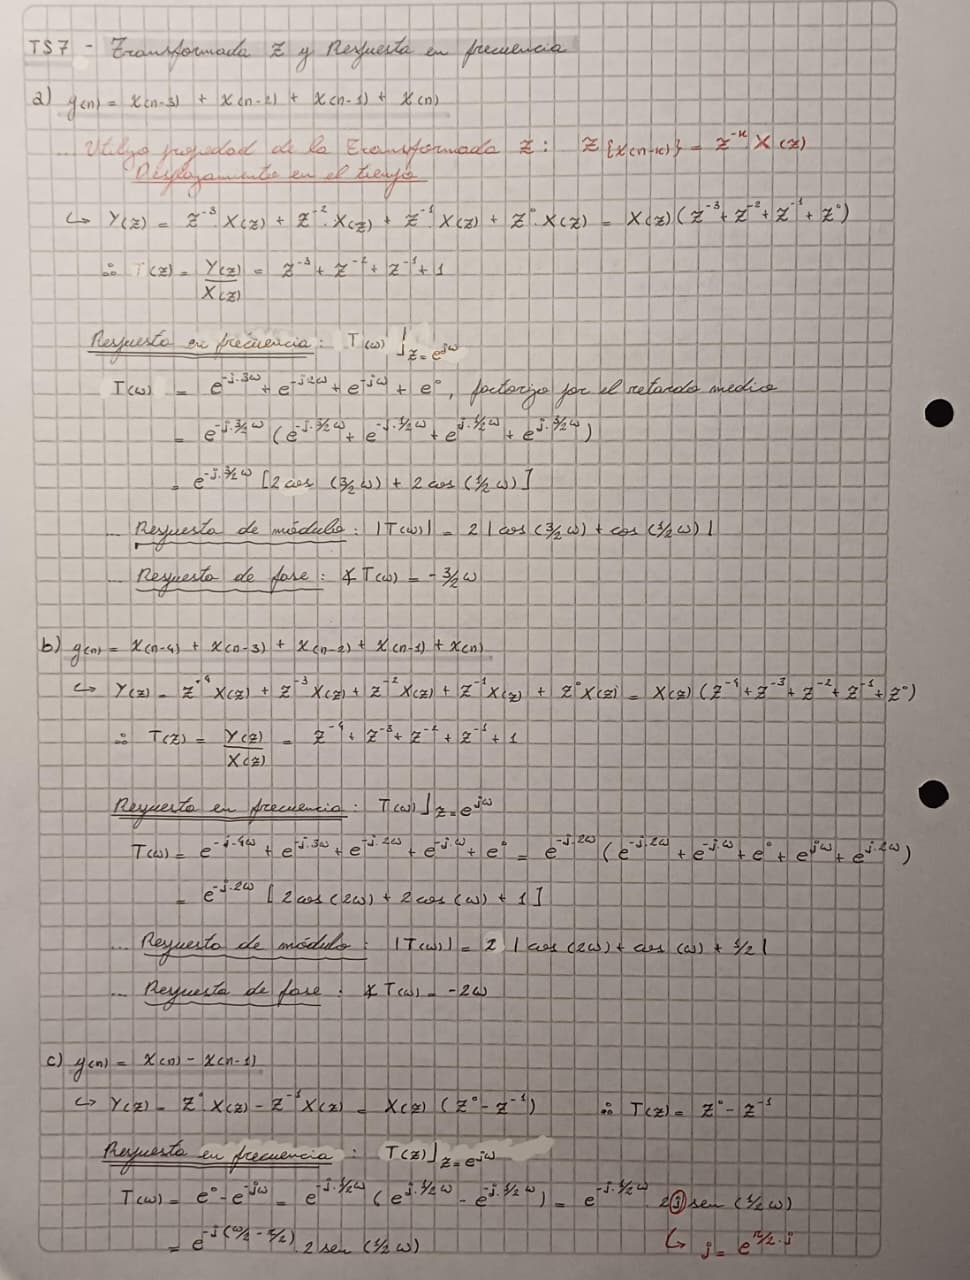

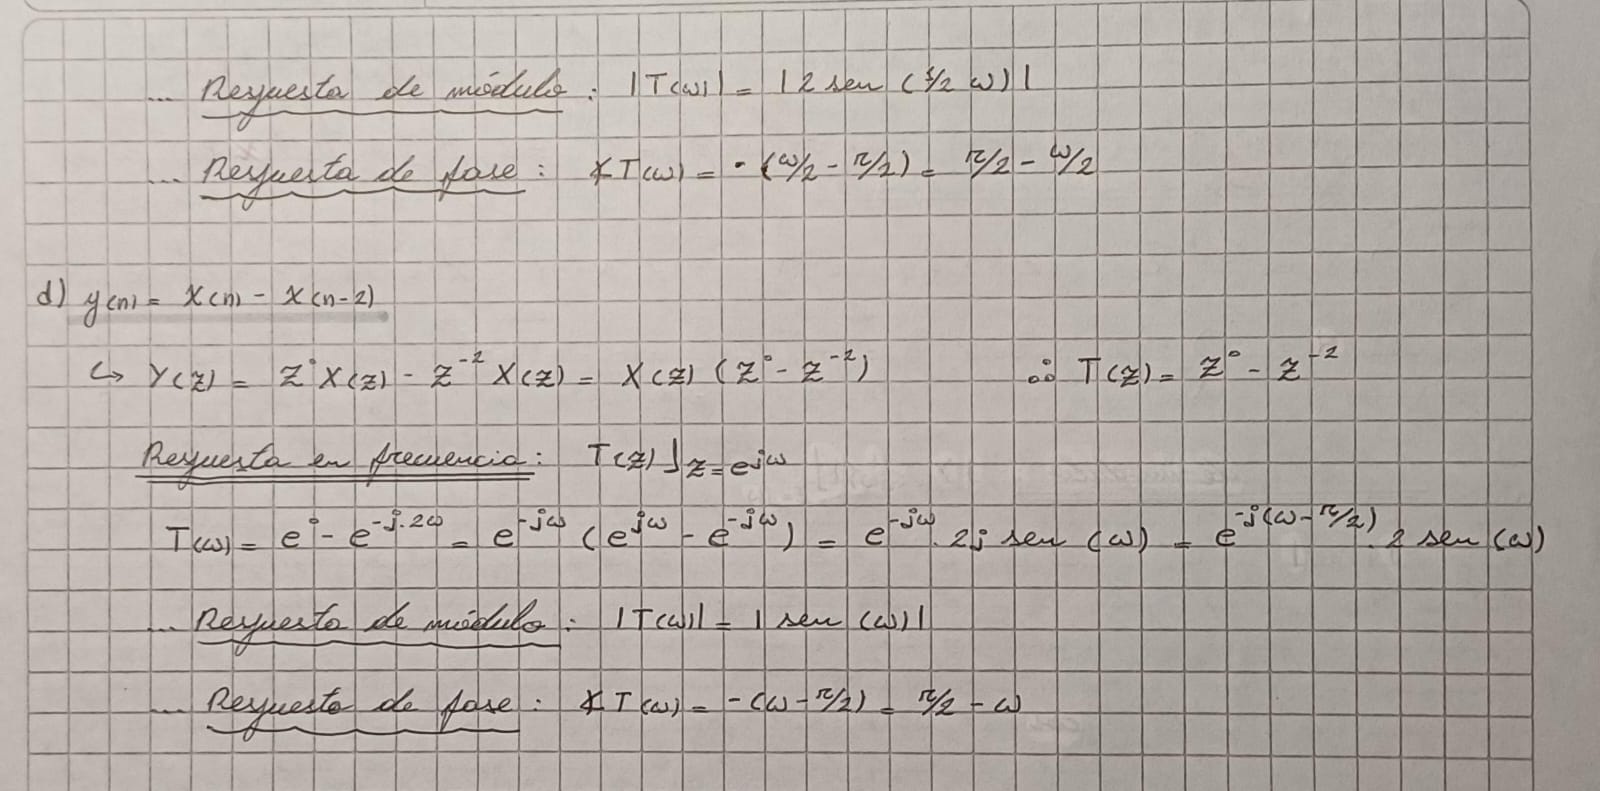

Posteriormente, se desarrolló el siguiente algoritmo, que permite verificar estos resultados de manera gráfica.

In [42]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as sig
from numpy.fft import fft
import scipy.signal as sig

# --------------------------------- Definición de funciones --------------------------------- #

def filtro_digital (b, a, w_num, h_num):
    
    w, h = sig.freqz (b = b, a = a)
    fase = np.unwrap(np.angle(h))
    fase_num = np.unwrap(np.angle(h_num))
    
    plt.figure ()

    plt.subplot (2, 1, 1)
    plt.plot (w, 20*np.log10(np.abs(h)), color='black', lw=2.5)
    plt.plot (w_num, 20*np.log10(np.abs(h_num)), ls='--', color='orange', label='Resol. numérica')
    plt.title ('Respuesta de módulo')
    plt.xlabel ('Pulsación angular [rad/muestra]')
    plt.ylabel ('|H(w)| [dB]')
    plt.ylim (-50, 20)
    plt.legend ()
    plt.grid (True)

    plt.subplot (2, 1, 2)
    plt.plot (w, np.degrees(fase), color='black', lw=2.5)
    plt.plot (w_num, np.degrees(fase_num), ls='--', color='orange')
    plt.title ('Respuesta de fase')
    plt.xlabel ('Pulsación angular [rad/muestra]')
    plt.ylabel ('Fase [°]')
    plt.grid (True)

    plt.tight_layout ()
    plt.show ()
    
    return

# --------------------------------- Definición de parámetros --------------------------------- #

coef_Ba = [1, 1, 1, 1]
coef_Bb = [1, 1, 1, 1, 1]
coef_Bc = [1, -1]
coef_Bd = [1, 0, -1]

coef_A = 1 # pues los 4 son filtros de respuesta finita

w = np.linspace (0, np.pi, 1000)

# --------------------------------- Verificación numérica --------------------------------- #

h_num_a = 2 * np.exp(-1j*1.5*w) * (np.cos(1.5*w) + np.cos(0.5*w))
h_num_b = np.exp(-1j*2*w) * (1 + 2*np.cos(w) + 2*np.cos(2*w))
h_num_c = 2 * np.sin(w/2) * np.exp(1j*(np.pi/2-w/2))
h_num_d = 2 * np.sin(w) * np.exp(1j*(np.pi/2-w))

**a)** $y_{(n)}=x_{(n-3)}+x_{(n-2)}+_{(n-1)}+x_{(n)}$

C:\Users\Tuti\AppData\Local\Temp\ipykernel_6132\908843497.py:18: RuntimeWarning: divide by zero encountered in log10
  plt.plot (w, 20*np.log10(np.abs(h)), color='black', lw=2.5)


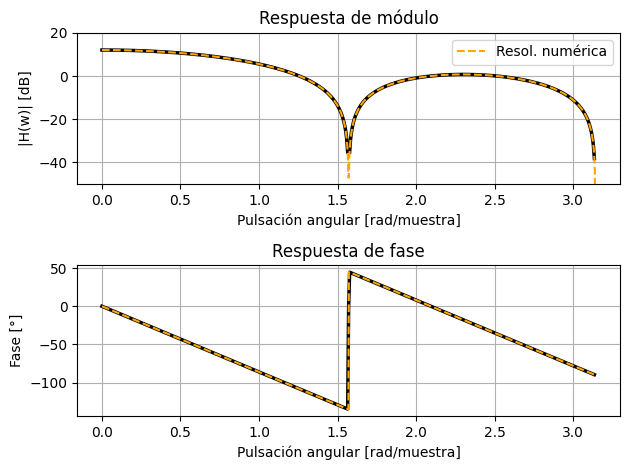

In [46]:
filtro_digital (b = coef_Ba, a = coef_A, w_num = w, h_num = h_num_a)

**b)** $y_{(n)}=x_{(n-4)}+x_{(n-3)}+x_{(n-2)}+_{(n-1)}+x_{(n)}$

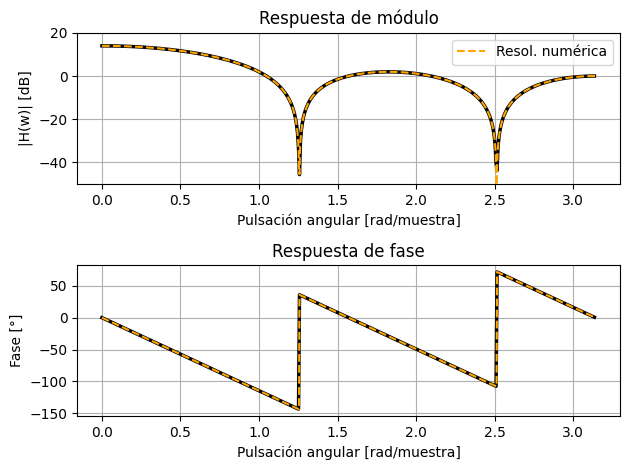

In [44]:
filtro_digital (b = coef_Bb, a = coef_A, w_num = w, h_num = h_num_b)

**c)** $y_{(n)}=x_{(n)}-x_{(n-1)}$

C:\Users\Tuti\AppData\Local\Temp\ipykernel_6132\908843497.py:18: RuntimeWarning: divide by zero encountered in log10
  plt.plot (w, 20*np.log10(np.abs(h)), color='black', lw=2.5)
C:\Users\Tuti\AppData\Local\Temp\ipykernel_6132\908843497.py:19: RuntimeWarning: divide by zero encountered in log10
  plt.plot (w_num, 20*np.log10(np.abs(h_num)), ls='--', color='orange', label='Resol. numérica')


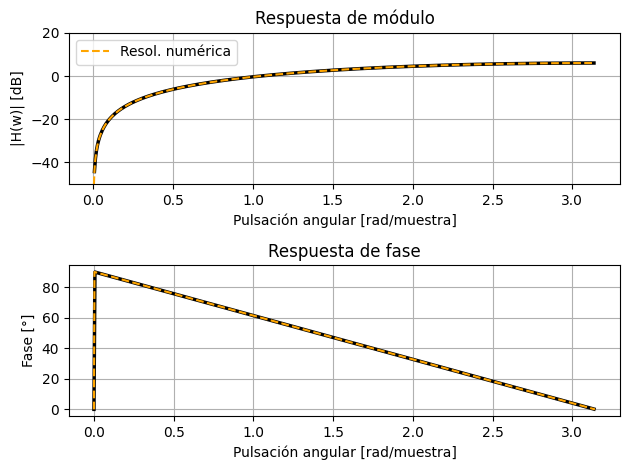

In [45]:
filtro_digital (b = coef_Bc, a = coef_A, w_num = w, h_num = h_num_c)

**c)** $y_{(n)}=x_{(n)}-x_{(n-2)}$

C:\Users\Tuti\AppData\Local\Temp\ipykernel_6132\954231824.py:18: RuntimeWarning: divide by zero encountered in log10
  plt.plot (w, 20*np.log10(np.abs(h)), color='black', lw=2.5)
C:\Users\Tuti\AppData\Local\Temp\ipykernel_6132\954231824.py:19: RuntimeWarning: divide by zero encountered in log10
  plt.plot (w_num, 20*np.log10(np.abs(h_num)), ls='--', color='orange', label='Resol. numérica')


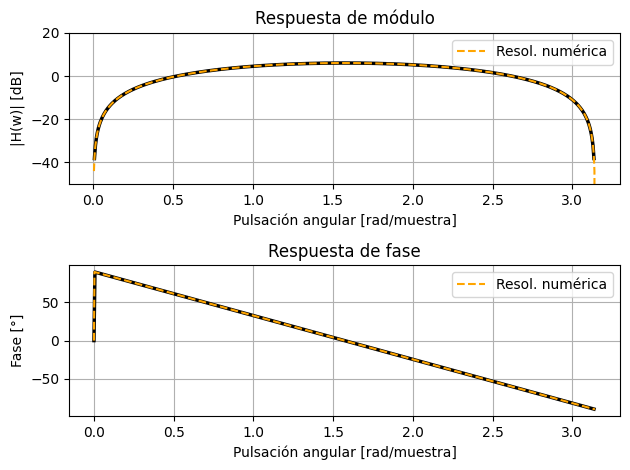

In [41]:
filtro_digital (b = coef_Bd, a = coef_A, w_num = w, h_num = h_num_d)

---

## Conclusiones

A raíz de los sistemas dados en forma de ecuaciones en diferencias, se obtuvieron, matemáticamente, sus correspondientes respuestas de módulo y fase. Como se menciona en la introducción, los filtros con lo que se trabajó son de "respuesta al impulso finita" (FIR), pues, como sus ecuaciones en diferencias son de carácter no recursivo, su respuesta al impulso eventualmente se extingue. 

A simple vista, se puede observar que las fases poseen una clara tendencia lineal, lo cual tiene sentido al trabajar con este tipo de filtros. Esta linealidad en la fase se traduce en un retardo de grupo constante. Esto significa que el sistema demorará a todas las frecuencias por igual, sin distorsión de grupo. De no resultar dichas fases lineales, las distintas componentes de cada señal se desalinearían en el tiempo, provocando que sus envolventes no solo resulten demoradas, sino también totalmente distorsionadas.

En cuanto a las respuestas de módulo, tanto el sistema del inciso a) como el del inciso b), presentan las características de un filtro pasa-bajos, donde a partir de una determinada "frecuencia de stop", la intensidad de la señal es atenuada considerablemente. Por otro lado, la respuesta del inciso c) denota un claro rasgo pasa-altos, pues, al contrario que los anteriores, la señal es atenuada por debajo de una dada "frecuencia de paso", tras la cual, su ganancia aumenta hasta un valor asintótico. Por último, la figura del inciso d) se asemeja a la configuración de un pasa-banda, caracterizado por permitir el paso de las frecuencias contenidas en una cierta "banda de paso", y atenuando todas las demás.